<a href="https://colab.research.google.com/github/claudio1975/SWISSTEXT_2022/blob/main/NLP_text_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP_&_INSURANCE: TEXT_ANALYSIS**

![](https://miro.medium.com/max/3310/1*2uLP1885m7LG9f638JlLGQ.png)

## Import Libraries

In [1]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 44.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install bertopic[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#setup deterministic results 
import numpy as np
from numpy.random import seed
seed=0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import string
#import langdetect 
#import ktrain
#from ktrain import text
import spacy
import gensim
from gensim.models import Word2Vec 
import gensim.downloader as gensim_api
from bertopic import BERTopic

## Requirements

In [4]:
print(np.__version__) 

1.21.6


In [5]:
print(pd.__version__) 

1.3.5


In [6]:
print(sklearn.__version__)

1.0.2


In [7]:
print(sns.__version__)

0.11.2


In [8]:
print(tf.__version__)

2.9.2


In [9]:
print(spacy.__version__)

3.4.4


In [10]:
print(gensim.__version__)

3.6.0


## Upload dataset

In [11]:
# https://www.kaggle.com/competitions/nlp-getting-started

In [12]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/claudio1975/SWISSTEXT_2022/main/data/train_clean.csv')

In [13]:
#from google.colab import files 
#uploaded = files.upload() 

In [14]:
# Reading File
#df_2 = pd.read_csv('train_clean.csv')

In [15]:
# select columns
df_2 = df_2[['id','keyword','location','text','target','lang']]
df_2.head()

,id,keyword,location,text,target,lang
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en


## Named Entity Recognition (NER) and Part of Speech Tagging (POS)

In [16]:
nlp = spacy.load("en_core_web_sm")

In [17]:
ner_lst = nlp.pipe_labels['ner']
print(len(ner_lst))
print(ner_lst)

18
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [18]:
# tag text cleaned
txt = df_2["text"].iloc[5]
doc_cleaned = nlp(txt)
# display result
#spacy.displacy.render(doc_cleaned, style="ent")
print(txt)
print([(X.text, X.label_) for X in doc_cleaned.ents])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
[('#RockyFire Update', 'MONEY'), ('California', 'GPE'), ('20', 'CARDINAL'), ('Lake County', 'GPE'), ('#CAfire #', 'MONEY')]


In [19]:
print(f"{'text':{15}} {'NER':{10}} {'NER explained':{20}} ")
for ent in doc_cleaned.ents:
  print(f'{ent.text:{15}} {ent.label_:{10}} {spacy.explain(ent.label_):{20}}')

text            NER        NER explained        
#RockyFire Update MONEY      Monetary values, including unit
California      GPE        Countries, cities, states
20              CARDINAL   Numerals that do not fall under another type
Lake County     GPE        Countries, cities, states
#CAfire #       MONEY      Monetary values, including unit


In [20]:
tag_lst = nlp.pipe_labels['tagger']
print(len(tag_lst))
print(tag_lst)

50
['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'XX', '_SP', '``']


In [21]:
print(txt)
print([(X.text, X.pos_, X.tag_) for X in doc_cleaned])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
[('#', 'SYM', '$'), ('RockyFire', 'VERB', 'VB'), ('Update', 'PROPN', 'NNP'), ('=', 'NOUN', 'NN'), ('>', 'X', 'XX'), ('California', 'PROPN', 'NNP'), ('Hwy', 'PROPN', 'NNP'), ('.', 'PROPN', 'NNP'), ('20', 'NUM', 'CD'), ('closed', 'VERB', 'VBD'), ('in', 'ADP', 'IN'), ('both', 'DET', 'DT'), ('directions', 'NOUN', 'NNS'), ('due', 'ADP', 'IN'), ('to', 'ADP', 'IN'), ('Lake', 'PROPN', 'NNP'), ('County', 'PROPN', 'NNP'), ('fire', 'NOUN', 'NN'), ('-', 'PUNCT', ':'), ('#', 'NOUN', 'NN'), ('CAfire', 'NOUN', 'NN'), ('#', 'NOUN', 'NN'), ('wildfires', 'VERB', 'VBZ')]


In [22]:
print(f"{'text':{10}} {'POS':{10}} {'TAG':{10}} {'POS explained':{20}} {'tag explained'} ")
for token in doc_cleaned:
  print(f'{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.pos_):{20}} {spacy.explain(token.tag_)}')

text       POS        TAG        POS explained        tag explained 
#          SYM        $          symbol               symbol, currency
RockyFire  VERB       VB         verb                 verb, base form
Update     PROPN      NNP        proper noun          noun, proper singular
=          NOUN       NN         noun                 noun, singular or mass
>          X          XX         other                unknown
California PROPN      NNP        proper noun          noun, proper singular
Hwy        PROPN      NNP        proper noun          noun, proper singular
.          PROPN      NNP        proper noun          noun, proper singular
20         NUM        CD         numeral              cardinal number
closed     VERB       VBD        verb                 verb, past tense
in         ADP        IN         adposition           conjunction, subordinating or preposition
both       DET        DT         determiner           determiner
directions NOUN       NNS        noun        

## Text pre-processing

In [23]:
def lemmatizer(text):        
    lem = []
    doc = nlp(text)
    for word in doc:
        lem.append(word.lemma_)
    return " ".join(lem)
def clean_text(text):
    # Normalize Text
    text = text.lower()
    # Remove Unicode Characters
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '',text)
    # Remove Punctuaction
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text) 
    # Remove Stopwords
    all_stop_words = nlp.Defaults.stop_words
    text = " ".join([word for word in str(text).split() if word not in all_stop_words])
    # Lemmatization
    text = lemmatizer(text)
    text = re.sub(r'-PRON-', '',text)
    return text


In [24]:
i=3
df_cleaned = pd.DataFrame(df_2.apply(lambda x: clean_text(x.iloc[i]), axis=1), columns = ['text_cleaned'])


In [25]:
df_3 = pd.concat([df_2, df_cleaned], axis=1)
df_3.head()

,id,keyword,location,text,target,lang,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en,deed reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en,got send photo ruby alaska smoke wildfire pour...


In [26]:
df_3['text'][5]


'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

In [27]:
df_3['text_cleaned'][5]

'rockyfire update california hwy closed directions lake county fire cafire wildfire'

## N-Grams

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(corpus)                   # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_uni = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

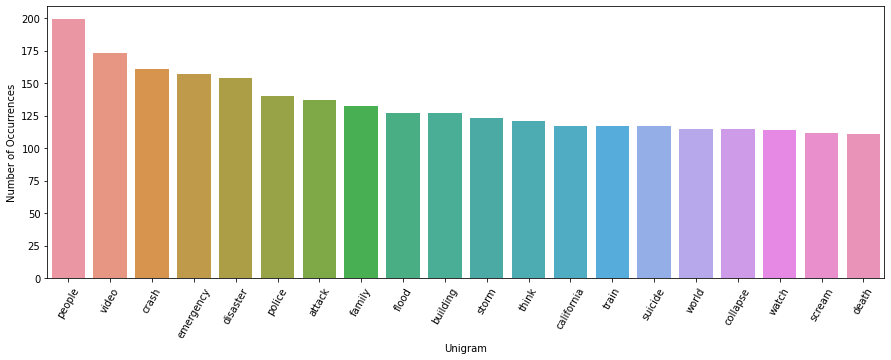

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_uni['unigram'], y=df_uni['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Unigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

In [30]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(corpus)                   # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_bi = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

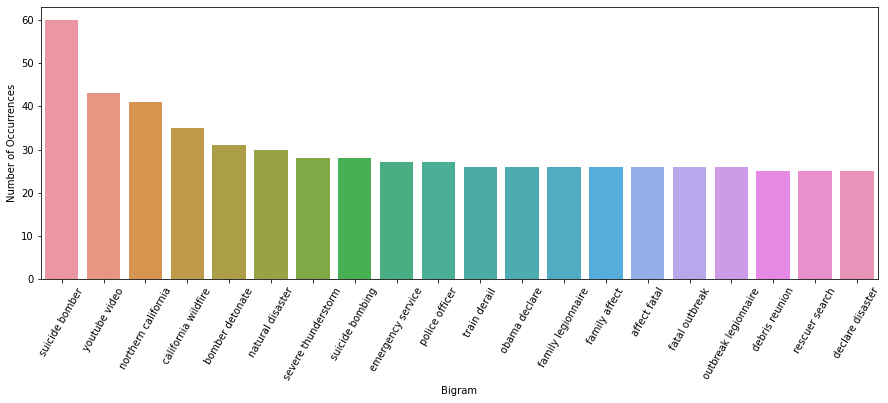

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_bi['bigram'], y=df_bi['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Bigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

In [32]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),                     # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})', # num chars >= 5
                          min_df=2).fit(corpus)                  # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_tri = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

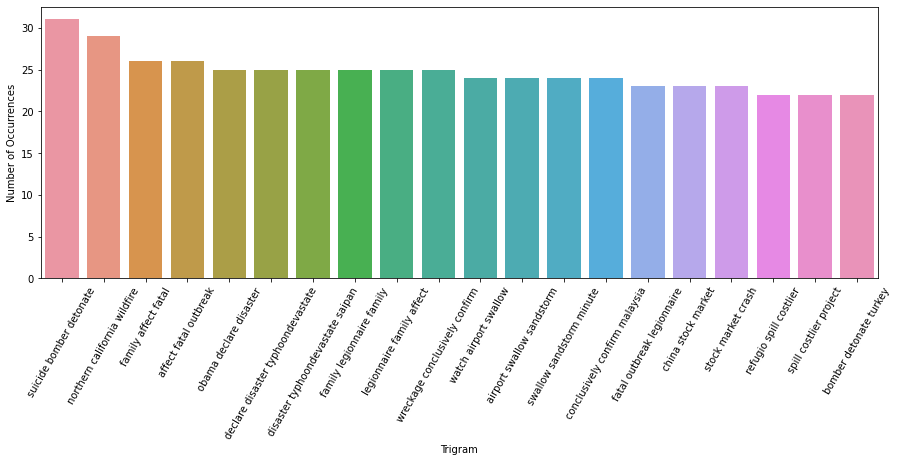

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_tri['trigram'], y=df_tri['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Trigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

## Topic Modelling with BertTopic

In [34]:
tfidf = TfidfVectorizer(ngram_range=(1,1),                       # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})', # num chars >= 5
                          min_df=2).fit(df_3['text_cleaned'])    # minimum required occurences of a word      

In [35]:
model = BERTopic(nr_topics=10,
    vectorizer_model=tfidf,
    calculate_probabilities=True,
    verbose=True)
topics, probs = model.fit_transform(df_3['text_cleaned'])

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

2023-01-19 19:42:50,136 - BERTopic - Transformed documents to Embeddings
2023-01-19 19:43:24,584 - BERTopic - Reduced dimensionality
2023-01-19 19:43:36,490 - BERTopic - Clustered reduced embeddings
2023-01-19 19:43:38,089 - BERTopic - Reduced number of topics from 200 to 11


In [36]:
freq = model.get_topic_info()
freq.head()

,Topic,Count,Name
0,-1,6032,-1_collapse_building_scream_crash
1,0,228,0_drown_migrant_hundred_rescuer
2,1,214,1_thunderstorm_severe_twister_typhoon
3,2,183,2_bomber_detonate_suicide_saudi
4,3,160,3_northern_california_obama_wildfire


In [37]:
model.get_topic(4)

[('legionnaire', 0.2312086855229622),
 ('malaysia', 0.20021995140593962),
 ('family', 0.181722545501801),
 ('debris', 0.17253192864140993),
 ('outbreak', 0.1680688032848993),
 ('wreckage', 0.16490415834709576),
 ('investigator', 0.1518944983007365),
 ('confirm', 0.13404786082428566),
 ('structural', 0.12053663692885629),
 ('failure', 0.11932113938717312)]

In [38]:
model.visualize_barchart()

In [39]:
tfidf_2 = TfidfVectorizer(ngram_range=(2,2),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(df_3['text_cleaned'])     # minimum required occurences of a word   

In [40]:
model_2 = BERTopic(nr_topics=10,
    vectorizer_model=tfidf_2,
    calculate_probabilities=True,
    verbose=True)
topics, probs = model_2.fit_transform(df_3['text_cleaned'])

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

2023-01-19 19:43:41,611 - BERTopic - Transformed documents to Embeddings
2023-01-19 19:43:54,277 - BERTopic - Reduced dimensionality
2023-01-19 19:44:05,609 - BERTopic - Clustered reduced embeddings
2023-01-19 19:44:07,100 - BERTopic - Reduced number of topics from 191 to 11


In [41]:
freq = model_2.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,4835,-1_rescuer search_natural disaster_nuclear wea...
1,0,419,0_police officer_desolation smaug_hobbit desol...
2,1,390,1_bridge collapse_structural failure_drown dro...
3,2,389,2_mortal kombat_flash flood_islamic state_unit...
4,3,338,3_california wildfire_northern california_evac...
5,4,280,4_emergency service_emergency department_oklah...
6,5,270,5_severe thunderstorm_thunderstorm warning_mun...
7,6,177,6_anniversary devastation_storm storm_japanese...
8,7,176,7_youtube video_video youtube_music video_anim...
9,8,175,8_lightning strike_darude sandstorm_tomorrow n...


In [42]:
model_2.get_topic(4)

[('emergency service', 0.35006807026261566),
 ('emergency department', 0.20882271992262907),
 ('oklahoma tornado', 0.1316003804313668),
 ('service emergency', 0.13003806196018125),
 ('structural integrity', 0.12959849302923884),
 ('battle blaze', 0.07777096356172088),
 ('building downtown', 0.07777096356172088),
 ('laugh panic', 0.07777096356172088),
 ('military family', 0.07751130415487571),
 ('ultimalucha luchaunderground', 0.07751130415487571)]

In [43]:
model_2.visualize_barchart()

In [44]:
tfidf_3 = TfidfVectorizer(ngram_range=(1,3),                      # n_gram_type
                          token_pattern = r'([a-zA-Z0-9-/]{4,})', # num chars >= 4
                          min_df=2).fit(df_3['text_cleaned'])     # minimum required occurences of a word   

In [45]:
model_3 = BERTopic(nr_topics=10,
    vectorizer_model=tfidf_3,
    calculate_probabilities=True,
    verbose=True)
topics, probs = model_3.fit_transform(df_3['text_cleaned'])

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

2023-01-19 19:44:10,047 - BERTopic - Transformed documents to Embeddings
2023-01-19 19:44:23,124 - BERTopic - Reduced dimensionality
2023-01-19 19:44:34,627 - BERTopic - Clustered reduced embeddings
2023-01-19 19:44:36,616 - BERTopic - Reduced number of topics from 198 to 11


In [46]:
freq = model_3.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,6046,-1_fire_like_video_burn
1,0,269,0_stock_cliff_demolish_china
2,1,200,1_crush_sinkhole_swallow_stretcher
3,2,165,2_body_cross_shoulder_leather
4,3,158,3_suicide_bomber_suicide bomber_detonate
5,4,146,4_ambulance_fear_crash_zone
6,5,142,5_accident_airplane_collision_collide
7,6,141,6_thunderstorm_flood_severe_severe thunderstorm
8,7,120,7_train_derail_train derail_tragedy
9,8,115,8_emergency_plan_calgary_bayelsa


In [47]:
model_3.get_topic(4)

[('ambulance', 0.14477724550827845),
 ('fear', 0.1447623971706947),
 ('crash', 0.133647755662647),
 ('zone', 0.1312399902268744),
 ('helicopter', 0.11952861193569089),
 ('pakistani', 0.08255556784692199),
 ('danger', 0.07006135621398976),
 ('course', 0.06522302857849228),
 ('like zone', 0.053905399994846906),
 ('come soon', 0.04800536983338248)]

In [48]:
model_3.visualize_barchart()

### Word Embedding

In [49]:
def tokenize(sentence):
  sentence = str(sentence).replace("\n", " ")
  token = nlp(sentence)
  tokens = [w.text for w in token]
  # remove short tokens
  tokens = [t for t in tokens if len(t) > 4]
  return tokens

In [50]:
data = df_3['text_cleaned'].apply(tokenize)
def vocabulary(doc):        
    corpus = []
    for word in doc:
        corpus.append(word)
    return corpus

In [51]:
corpus = vocabulary(data)

In [52]:
def similar(model, word):
    return model.wv.most_similar(word) 

def embedding(model, word):
    return model.wv[word]

def similarity(model, word1, word2):
    return model.wv.similarity(word1, word2)

## CBOW Model

![](https://media.geeksforgeeks.org/wp-content/uploads/cbow-1.png)

In [53]:
# Create CBOW model
model_cbow = Word2Vec(corpus, min_count = 50)

In [54]:
print(model_cbow)

Word2Vec(vocab=99, size=100, alpha=0.025)


In [55]:
# summarize vocabulary
words = list(model_cbow.wv.vocab)
print(words)

['earthquake', 'forest', 'evacuation', 'people', 'wildfire', 'california', 'photo', 'school', 'update', 'flood', 'disaster', 'cause', 'emergency', 'happen', 'damage', 'crash', 'break', 'night', 'police', 'thank', 'leave', 'black', 'train', 'truck', 'video', 'accident', 'great', 'report', 'cross', 'injury', 'right', 'change', 'today', 'issue', 'scream', 'youtube', 'thing', 'debris', 'family', 'state', 'wreck', 'death', 'house', 'service', 'destroy', 'think', 'siren', 'weather', 'world', 'attack', 'survive', 'watch', 'start', 'movie', 'storm', 'collapse', 'military', 'japan', 'charge', 'northern', 'nuclear', 'suicide', 'injure', 'obama', 'weapon', 'release', 'woman', 'atomic', 'flame', 'hostage', 'building', 'wound', 'drown', 'panic', 'hiroshima', 'bombing', 'rescue', 'explode', 'evacuate', 'confirm', 'content', 'water', 'casualty', 'collide', 'thunderstorm', 'fatal', 'crush', 'legionnaire', 'malaysia', 'deluge', 'demolish', 'derail', 'detonate', 'electrocute', 'reddit', 'fatality', 'obl

In [56]:
similar(model_cbow, 'wildfire')

[('right', 0.26777854561805725),
 ('fatal', 0.2201639711856842),
 ('leave', 0.21283367276191711),
 ('charge', 0.20820598304271698),
 ('detonate', 0.19924767315387726),
 ('damage', 0.18449276685714722),
 ('storm', 0.16648530960083008),
 ('panic', 0.16620846092700958),
 ('great', 0.16515466570854187),
 ('water', 0.15725219249725342)]

In [57]:
embedding(model_cbow, 'wildfire')

array([ 0.00213351,  0.00430569,  0.00409262,  0.00423512,  0.00286535,
        0.0010159 ,  0.00154674,  0.00369507,  0.0003225 ,  0.00099945,
        0.0047037 , -0.00071028, -0.00187705, -0.00139609, -0.00260138,
       -0.00171659, -0.00288194,  0.00281279,  0.00048111, -0.00444634,
        0.00558709,  0.00406735,  0.00092443, -0.00037319,  0.00175389,
        0.00063071,  0.0025979 , -0.00472217,  0.00123458,  0.00383933,
        0.00226621, -0.00252012, -0.00480803,  0.00220171, -0.00119956,
        0.0026215 ,  0.00305986, -0.00541154,  0.00444331, -0.00081518,
       -0.00189377,  0.00306718, -0.00437232,  0.00287687, -0.00477928,
       -0.00539293,  0.00372981,  0.00034014, -0.00104744, -0.00227302,
        0.00576594,  0.00160772, -0.00324745, -0.00084395,  0.0035087 ,
       -0.00290885, -0.00169986, -0.00396829,  0.00119391, -0.00517073,
       -0.00011924,  0.00476818, -0.00237183,  0.000782  , -0.00347287,
        0.00110287,  0.00028387, -0.00397631,  0.00642529, -0.00

In [58]:
similarity(model_cbow, 'wildfire', "california")

0.09312478

In [59]:
X = model_cbow[model_cbow.wv.vocab]

<ipython-input-59-d60f9284421b>:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [60]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

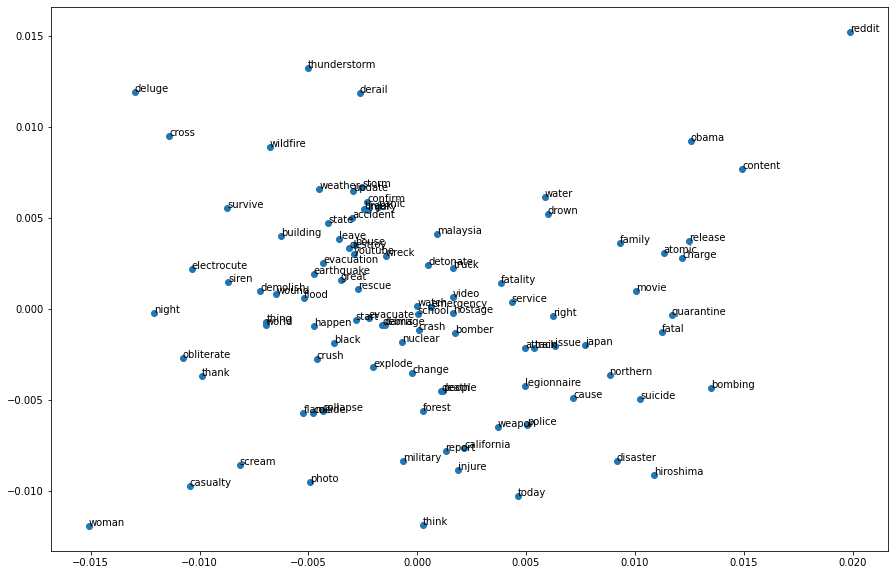

In [61]:
plt.figure(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


## Skip Gram Model

![](https://media.geeksforgeeks.org/wp-content/uploads/skip_gram.png)

In [62]:
# Create Skip Gram model
model_sg = Word2Vec(corpus, min_count = 50, sg = 1)

In [63]:
print(model_sg)

Word2Vec(vocab=99, size=100, alpha=0.025)


In [64]:
# summarize vocabulary
words = list(model_sg.wv.vocab)
print(words)

['earthquake', 'forest', 'evacuation', 'people', 'wildfire', 'california', 'photo', 'school', 'update', 'flood', 'disaster', 'cause', 'emergency', 'happen', 'damage', 'crash', 'break', 'night', 'police', 'thank', 'leave', 'black', 'train', 'truck', 'video', 'accident', 'great', 'report', 'cross', 'injury', 'right', 'change', 'today', 'issue', 'scream', 'youtube', 'thing', 'debris', 'family', 'state', 'wreck', 'death', 'house', 'service', 'destroy', 'think', 'siren', 'weather', 'world', 'attack', 'survive', 'watch', 'start', 'movie', 'storm', 'collapse', 'military', 'japan', 'charge', 'northern', 'nuclear', 'suicide', 'injure', 'obama', 'weapon', 'release', 'woman', 'atomic', 'flame', 'hostage', 'building', 'wound', 'drown', 'panic', 'hiroshima', 'bombing', 'rescue', 'explode', 'evacuate', 'confirm', 'content', 'water', 'casualty', 'collide', 'thunderstorm', 'fatal', 'crush', 'legionnaire', 'malaysia', 'deluge', 'demolish', 'derail', 'detonate', 'electrocute', 'reddit', 'fatality', 'obl

In [65]:
similar(model_sg, 'wildfire')

[('right', 0.34113240242004395),
 ('fatal', 0.3393630087375641),
 ('charge', 0.308841347694397),
 ('detonate', 0.28459224104881287),
 ('leave', 0.2648811936378479),
 ('damage', 0.26305320858955383),
 ('bombing', 0.26209864020347595),
 ('service', 0.24486547708511353),
 ('release', 0.24460047483444214),
 ('water', 0.24001751840114594)]

In [66]:
embedding(model_sg, 'wildfire')

array([ 1.6889593e-03,  4.3038493e-03,  4.1562505e-03,  4.2066467e-03,
        2.3006133e-03,  1.1894727e-04,  1.2625520e-03,  3.2352055e-03,
        9.4539777e-04,  1.4180266e-03,  4.7654784e-03, -4.2055332e-04,
       -2.1024628e-03, -6.6905044e-04, -1.6482733e-03, -1.9621947e-03,
       -3.8330378e-03,  3.3910726e-03,  1.3643908e-03, -4.9508354e-03,
        6.2874174e-03,  3.8202966e-03,  1.4147582e-03,  2.6394404e-04,
        1.9471772e-03,  7.2443410e-04,  2.8785754e-03, -4.9451245e-03,
        8.5830782e-04,  3.7368201e-03,  2.6147026e-03, -2.0609922e-03,
       -5.2869315e-03,  3.4051002e-03, -7.8120647e-04,  2.2259066e-03,
        2.5225431e-03, -6.6543552e-03,  4.7536930e-03,  1.3317699e-04,
       -8.3947158e-04,  4.4748080e-03, -4.7363685e-03,  3.4905600e-03,
       -5.7726209e-03, -6.1199414e-03,  3.5429066e-03, -4.4335576e-04,
       -1.4206861e-03, -1.5397627e-03,  7.3168571e-03,  2.0657650e-03,
       -3.6070009e-03,  2.8504455e-04,  2.8697571e-03, -1.6525618e-03,
      

In [67]:
similarity(model_sg, 'wildfire', "california")

0.21639422

In [68]:
X = model_sg[model_sg.wv.vocab]

<ipython-input-68-d8785f5129a3>:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [69]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

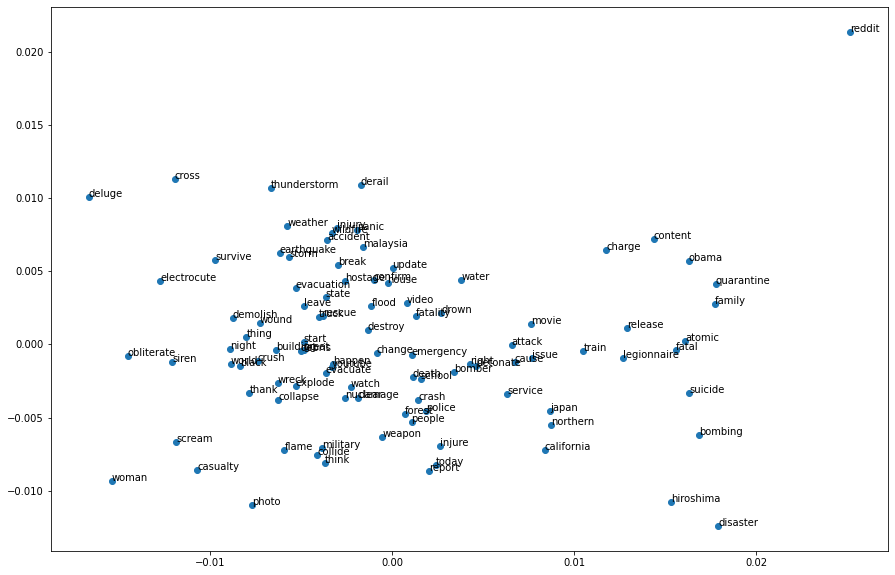

In [70]:
plt.figure(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [71]:
# export data set
#from google.colab import files
#df_3.to_csv('df_train.csv')
#files.download('df_train.csv') 